In [22]:
%%writefile /home/mel_yang/projects/bronzeage/f3stats/calcf3_TY.py
##f3 relationships where check to see if any other popns are mixture of ancient pop and something else
import plotting_funcs as pf
import projmodules as pm
from subprocess import Popen, PIPE
import HOdata
from multiprocessing import Pool

def dof3work(Apop):
    pD = "/mnt/solexa/mel_yang/bronzeage/data/"
    outpD = "/home/mel_yang/projects/bronzeage/f3stats/"
    fh = 'ind_A_v13_TBH5'
    fhind= 'ind_A_v13_TBH5'
    subset = 'Onge.outMbu_'+Apop

    allinds=["Onge"] #HOdata.alleas
    
    AB = [(Apop,ind) for ind in allinds]
    Xs = ["Mbuti"]
    pm.f3popfile(AB, Xs, outpD+fh, subset)
    pm.f3parfile(pD+fh,subset,popfh=outpD+fh)
    outfile = open(outpD+fh+'.f3.'+subset+".log",'w')
    mycommand1='mv '+pD+fh+'.f3.'+subset+'.par '+outpD+fh+'.f3.'+subset+'.par'
    varfile = Popen(mycommand1.split())
    varfile.communicate()
    mycommand = 'qp3Pop -p '+outpD+fh+'.f3.'+subset+'.par'
    print 'Running command', mycommand

    varfile = Popen(mycommand.split(), stdout = outfile)
    varfile.communicate()
    outfile.close()

ancinds=['Tianyuan']
mypool = Pool(1)
results = mypool.map(dof3work, ancinds)

Overwriting /home/mel_yang/projects/bronzeage/f3stats/calcf3_TY.py


In [67]:
%%writefile /home/mel_yang/projects/bronzeage/f3stats/calcf3_TYeas.py
##f3 relationships where check to see if any other popns are mixture of ancient pop and something else
import plotting_funcs as pf
import projmodules as pm
from subprocess import Popen, PIPE
import HOdata
from multiprocessing import Pool

def dof3work(Apop):
    pD = "/mnt/solexa/mel_yang/bronzeage/data/"
    outpD = "/home/mel_yang/projects/bronzeage/f3stats/"
    fh = 'ind_A_v13_TBH5'
    #fhind= 'ind_A_v13_TBH5.sepUlchi'
    subset = 'sepUlchi_'+Apop
    subset = 'EAS_'+Apop
    allinds=HOdata.allHOiwant
    allinds=HOdata.alleas
    #allinds=["Ulchi_s","Ulchi"]

    AB = [(Apop,ind) for ind in allinds]
    Xs = allinds
    #Xs=["Hezhen","Ulchi","Ulchi_s","Daur","Oroqen"]
    pm.f3popfile(AB, Xs, outpD+fh, subset)
    pm.f3parfile(pD+fh,subset,popfh=outpD+fh) #,indfh=pD+fhind)
    parfilename=fh+".f3."+subset+".par"
    mycommand1 = "mv %s %s" % (pD+parfilename,outpD)
    varfile = Popen(mycommand1.split())
    varfile.communicate()
    
    outfile = open(outpD+fh+'.f3.'+subset+".log",'w')
    mycommand = 'qp3Pop -p '+outpD+fh+'.f3.'+subset+'.par'
    print 'Running command', mycommand

    varfile = Popen(mycommand.split(), stdout = outfile)
    varfile.communicate()
    outfile.close()
ancinds=['Balikun','Donghuigou','XianShang','Zhougongmiao','Yaojia',
         'Tonglin','Linzi','Xiaoshuangqiao','Guandimiao','Tianyuan',
         'Han_NChina','Dai']
ancinds=['Guandimiao']
ancinds=["Kostenki14","Sardinian","UstIshim","Oroqen"] 
ancinds=["French","Hezhen","Boisman_MN"]
ancinds=["Stuttgart","Loschbour","Satsurblia","Vestonice16"]
ancinds=["Tianyuan","Dai","Han_NChina","French","UstIshim","Kostenki14","Hezhen","Oroqen","Boisman_MN"]
ancinds=["GoyetQ116-1"]
mypool = Pool(4)
results = mypool.map(dof3work, ancinds)

Overwriting /home/mel_yang/projects/bronzeage/f3stats/calcf3_TYeas.py


In [56]:
import projmodules as pm
pm.f3parfile??

In [65]:
import HOdata

pD = "/home/mel_yang/projects/bronzeage/"
outpD = "/home/mel_yang/projects/bronzeage/f3stats/"
fh1 = 'ind_A_v13_TBH4'
fh2 = 'ind_A_v13_TBH5'
Apop='Tianyuan'
subset1 = 'pdmix_'
subset2 = 'pdmix_'
subset2='EAS_'
logfile = open(outpD+fh1+'.f3.'+subset1+Apop+".log",'r')
logfileomit = open(outpD+fh1+'.f3.'+subset1+"Han_NChina.log",'r')
#logfileomit = open(outpD+fh1+'.f3.'+subset1+"Dai.log",'r')
#logfileomit = open(outpD+fh1+'.f3.'+subset1+"Tianyuan.log",'r')
logfileomit = open(outpD+fh2+'.f3.'+subset2+"French.log",'r')
skipover=[]
for line in logfileomit: 
    x=line.split()
    if x[0]!="result:": continue
    #if x[2] != "Abkhasian": break
    if float(x[6]) < -3: skipover.append((x[2],x[3])) 
logfileomit.close()

#print skipover
#skipover=[]
for line in logfile: 
    x=line.split()
    if x[0]!="result:": continue
    if x[2] not in HOdata.alleas or x[3] not in HOdata.alleas: continue
    if float(x[6]) < -2.5 and (x[2],x[3]) not in skipover: print '\t'.join(x[1:4]+x[4:7])
    #if float(x[6]) < -3 and (x[2],x[3]) not in skipover: print '\t'.join(x[1:4]+x[6:7])
logfile.close()

In [ ]:
Zhougongmiao	Dai	Han_Chongqing	-3.221
Zhougongmiao	Dai	Minnan	-3.088
Zhougongmiao	Gelao	Han_Chongqing	-3.824
Zhougongmiao	Maonan	Han_Chongqing	-3.236
Zhougongmiao	Mulam	Han_Chongqing	-3.531
Zhougongmiao	Zhuang	Han_Chongqing	-3.017
Zhougongmiao	Cambodian	Han_Sichuan	-3.040
Zhougongmiao	Thai	Han_Chongqing	-3.012
Zhougongmiao	Kazakh_China	Xibo	-3.413
Zhougongmiao	Atayal_Coriell	Han_Chongqing	-3.566
Zhougongmiao	Malay	Tujia	-3.143
Zhougongmiao	Malay	Dongxiang	-3.008
Zhougongmiao	Malay	Tujia	-3.143
Zhougongmiao	Malay	Dongxiang	-3.008

Guandimiao	Dai	Han_Chongqing	-3.338
Guandimiao	Dai	Han_Zhejiang	-3.007
Guandimiao	Dai	Minnan	-3.358
Guandimiao	Maonan	Han_Chongqing	-3.442
Guandimiao	Zhuang	Han_Chongqing	-3.318
Guandimiao	Cambodian	Han_HGDP	-3.692
Guandimiao	Tibetan_Yajiang	Yugur_Eastern	-3.150
Guandimiao	Uygur	Kazakh_China	-3.119
Guandimiao	Burmese	Yugur_Eastern	-3.694
Guandimiao	Paiwan	Han_Chongqing	-3.297

In [19]:
%%writefile /home/mel_yang/projects/bronzeage/f3stats/heatmap_Pontus_meledit_asia.R
args=commandArgs(TRUE)
PREFIX = as.character(args[1])
STATFILE = as.character(args[2])
LABEL = as.character(args[3])


X<-read.table(paste(PREFIX,'.map',sep=''))


library(fields)
library(RColorBrewer)


padding = 6

data<-read.table(paste(PREFIX,'.map',sep=''))

NAMES <- as.character(data[,1])
Latitude<-as.numeric(data[,2])
Longitude<-as.numeric(data[,3])

minLong <- min(Longitude)-5*padding
maxLong <- max(Longitude)+padding
minLat <- min(Latitude)-padding
maxLat <- max(Latitude)+padding

minLong <- 80-5*padding
maxLong <- 180.5+padding
minLat <- -45-padding
maxLat <- 75+padding

print(c(minLat,maxLat))
print(c(minLong,maxLong))
statistic=as.numeric(data[,4])

rgb.palette<-colorRampPalette(c("black","black","midnightblue","blue","lightskyblue","yellow","gold","red")) #
colours<-rgb.palette(30)

x<-statistic

png(paste(PREFIX,'.png',sep=''),width=1440*300/72,height=(maxLat-minLat)*1440*300/(maxLong-minLong)/72,res=300)

cols <- as.character(cut(statistic, breaks = length(colours),labels =colours))
plot(Longitude,Latitude,type="n",main=expression(paste(f[3])),xlim=c(minLong,maxLong),ylim=c(minLat,maxLat), cex.lab=2,cex.axis=2)
#,xlim=c(-25,25),ylim=c(40,70)
library(mapdata)
library(maps)
library(maptools)
#map(database='worldHires', fill=TRUE,resolution=0,lty=0,xlim=c(minLong,maxLong),ylim=c(minLat,maxLat),col='lightgray',boundary=FALSE)
map(database='worldHires', fill=TRUE,xlim=c(minLong,maxLong),ylim=c(minLat,maxLat),col='lightgray',boundary=FALSE)
#world(add=TRUE,fill=TRUE,shift=FALSE,col.land="white",col.water="lightskyblue3")

CASPIAN <- read.table('/home/mel_yang/rcode/Caspian.txt')
polygon(CASPIAN[,2:1],col='white',border='white')
abline(h = 39.657778, lty = 2)
abline(v = 115.871389, lty = 2)
PCH <- vector(length=length(Longitude))
PCH[1:length(PCH)] <- 21
#PCH[grepl('Jew',NAMES)] <- 22

points(Longitude,Latitude,pch=PCH,bg=cols,col="black",cex=3)
box()


###legend
tempcolours=rev(colours)
#legendposx= 150
legendposx= minLong+padding
legendwidth=2*padding
#legendtop=40
legendtop = maxLat-(maxLat-minLat)/1.5
legendbottom= minLat+(maxLat-minLat)/10
legendspan=legendtop-legendbottom
legendincrement=legendspan/length(colours)
for(i in 1:length(tempcolours)) {
  rect(legendposx,legendtop-(legendincrement*i),(legendposx+legendwidth),legendtop-(legendincrement*i-legendincrement),col=tempcolours[i],border=NA)
  #text((legendposx+15),(legendtop-(legendincrement*i-legendincrement/2)),"hello")
}
text(legendposx+legendwidth/2,legendtop+(maxLat-minLat)/20-5,round(max(statistic),3),cex=2)
text(legendposx+legendwidth/2,legendbottom-(maxLat-minLat)/20+5,round(min(statistic),3),cex=2)
rect(legendposx,legendtop,(legendposx+legendwidth),legendbottom,col=NA)

if (grepl('F4',STATFILE)) {
text(minLong+(maxLong-minLong)/2.5,minLat+2*padding,labels=expression(f[4]),cex=2,adj=0)
text(minLong+(maxLong-minLong)/2.5+1.25,minLat+2*padding,labels=LABEL,cex=2,adj=0)
}

if (grepl('F3',STATFILE)) {
text(minLong+(maxLong-minLong)/2.5,minLat+padding,labels=expression(f[3]),cex=2,adj=0)
text(minLong+(maxLong-minLong)/2.5+2.5,minLat+padding,labels=LABEL,cex=2,adj=0)
}


dev.off()



Overwriting /home/mel_yang/projects/bronzeage/f3stats/heatmap_Pontus_meledit_asia.R


In [20]:
%%bash
pD="/home/mel_yang/projects/bronzeage/f3stats/"
outname="F3.HOPD"
Rscript ${pD}heatmap_Pontus_meledit_asia.R ${pD}${outname} ${pD}${outname}.log "(Tianyuan, X; Mbuti)"

[1] -51  81
[1]  50.0 186.5
null device 
          1 


Loading required package: methods
Loading required package: spam
Loading required package: grid
Spam version 1.3-0 (2015-10-24) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: ‘spam’

The following objects are masked from ‘package:base’:

    backsolve, forwardsolve

Loading required package: maps
Warning message:
In `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels,  :
  duplicated levels in factors are deprecated
Loading required package: sp
Checking rgeos availability: TRUE


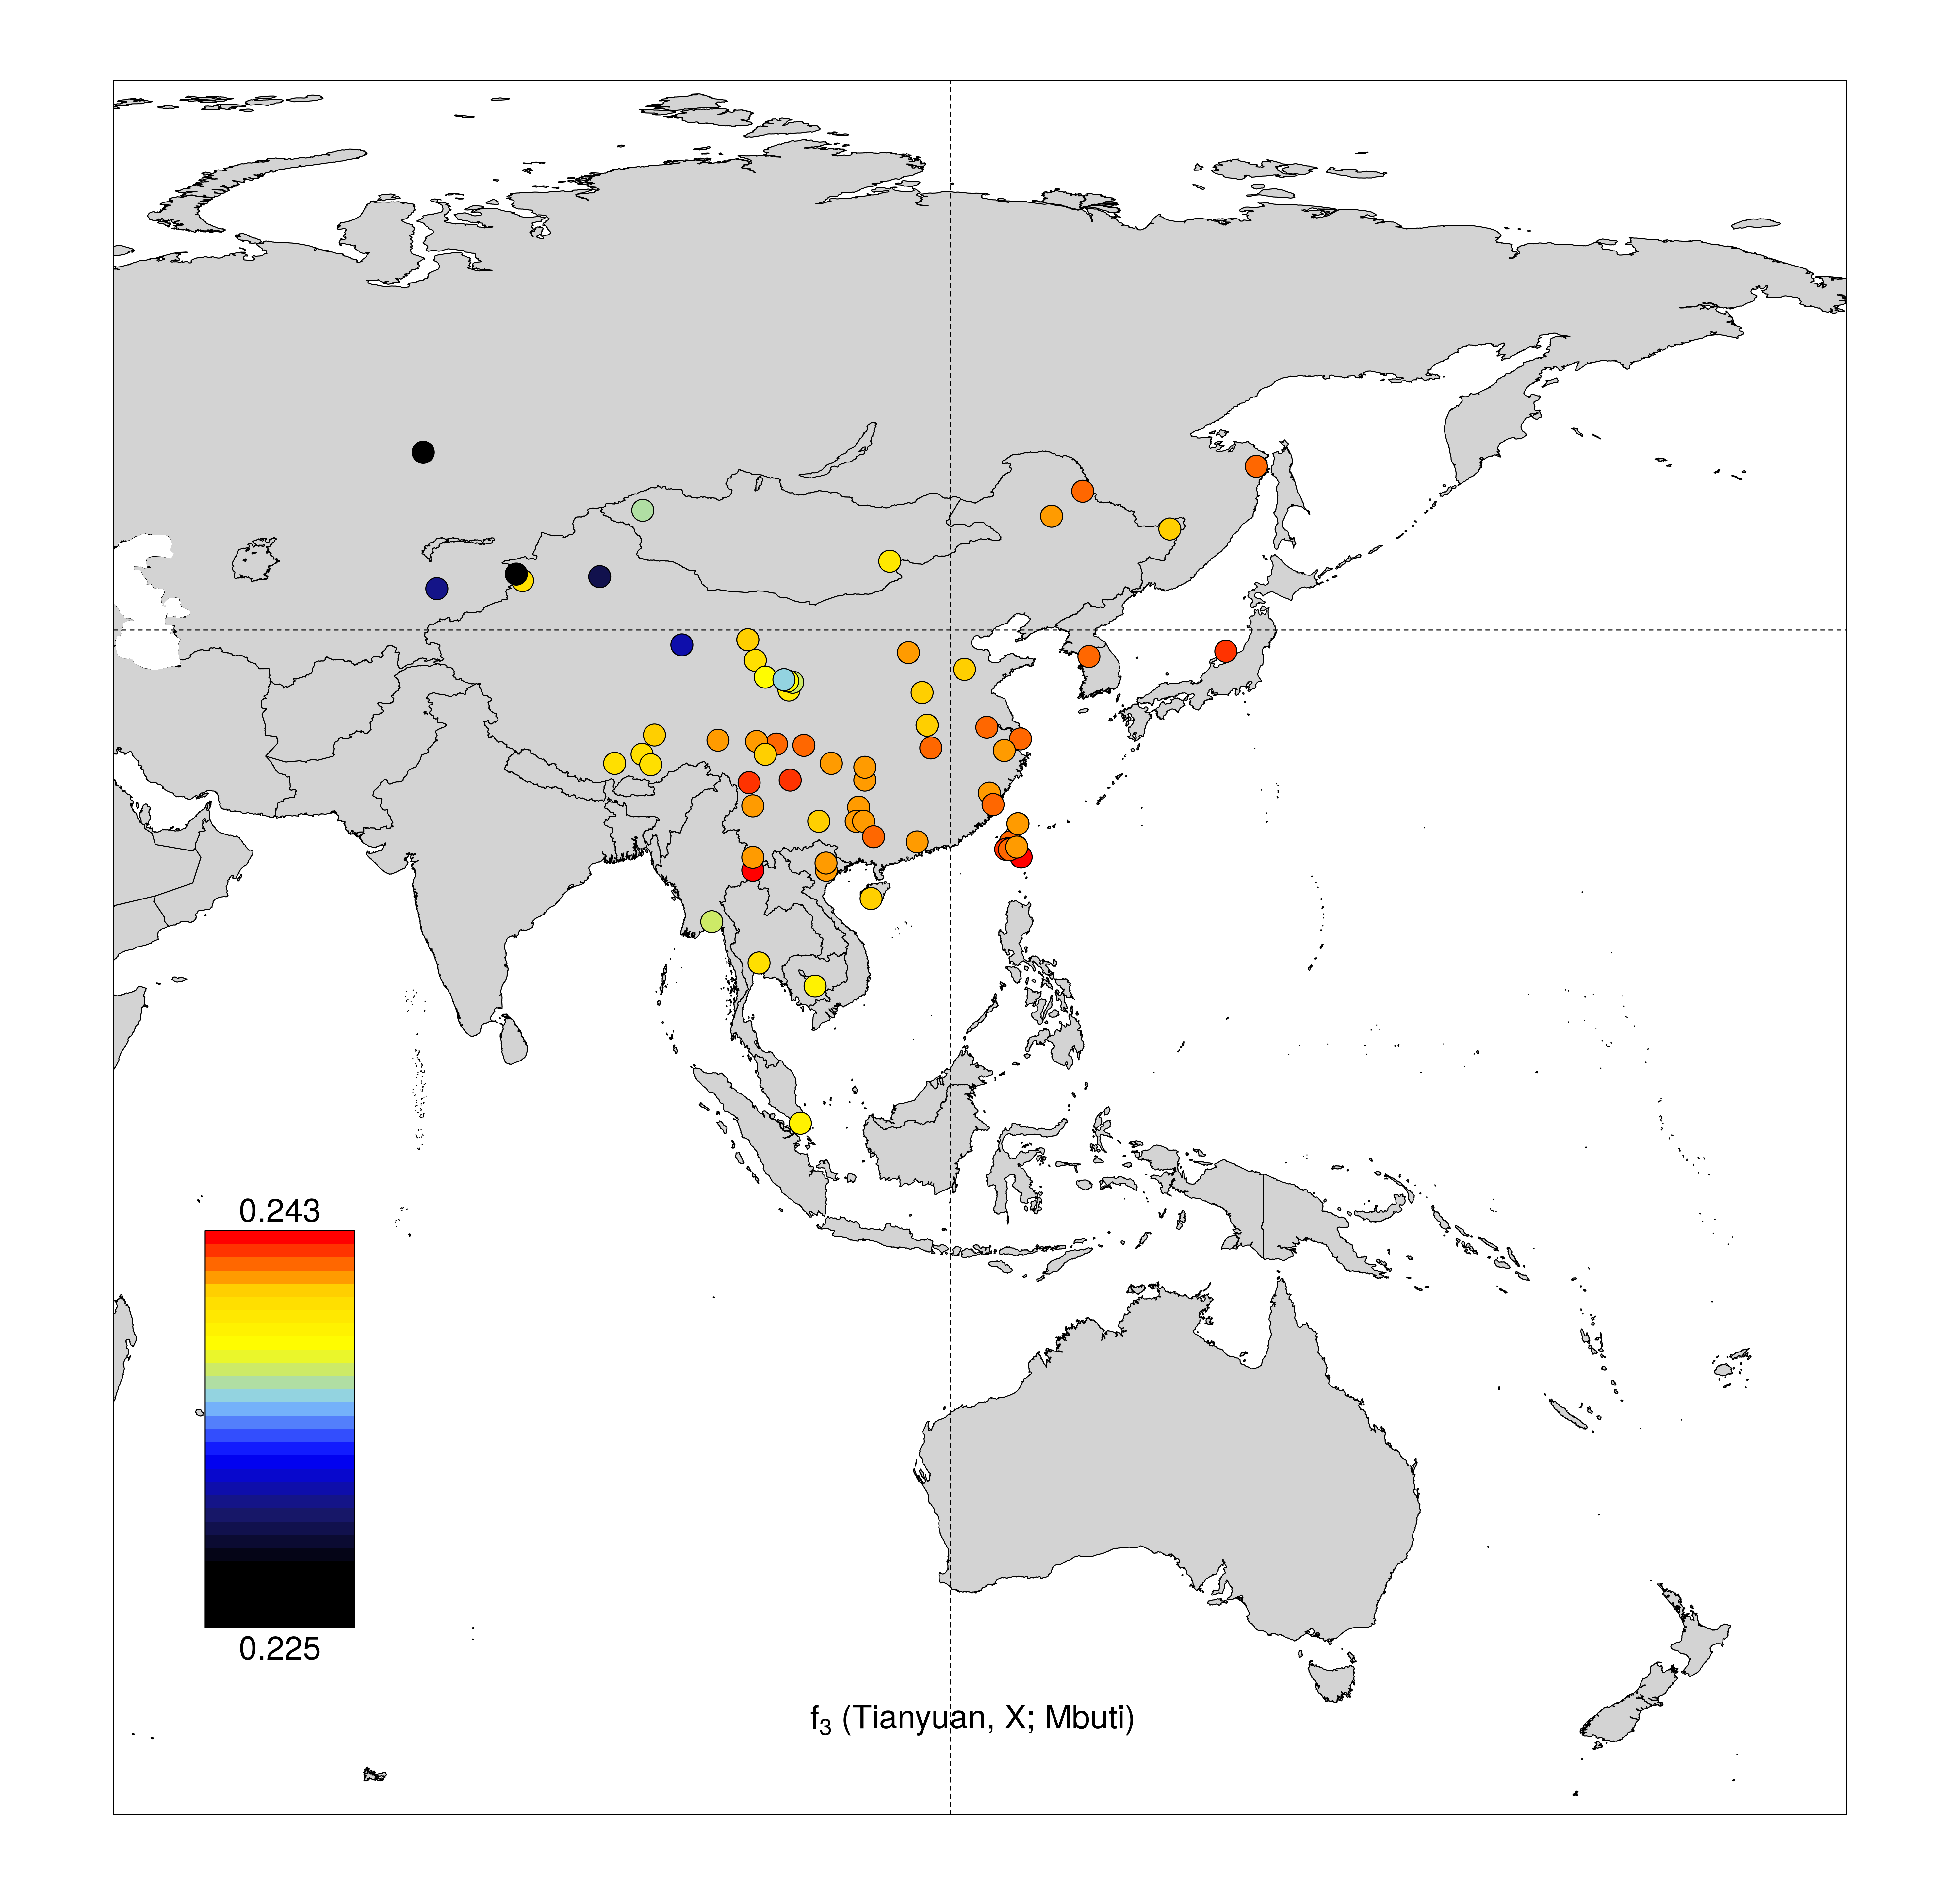

In [21]:
from IPython.display import Image
pD="/home/mel_yang/projects/bronzeage/f3stats/"
outname="F3.HOPD"
Image(filename=pD+outname+'.png') 